In [ ]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [43]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape # Returns (50000, 32, 32, 3), meaning 50,000 images that are 32x32 pixels with 3 RGB color channels.

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train.shape

In [44]:
# It is a 2D array of shape (50000, 1), but we only need a 1D array of labels — one label per image. 
# So we reshape it to (50000,) using reshape(-1,), which keeps the first dimension and removes the second.
y_train = y_train.reshape(-1,) # Keep first dimension, remove second.
y_train.shape

(50000,)

In [45]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(X, y, index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
X_train[0]

In [46]:
# Normalizing
# This makes training more stable and faster, especially for activation functions like ReLU, sigmoid, or tanh.
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train

In [ ]:
# Model
model = models.Sequential()

# The general structure here is to do:
# Conv layers => Pooling layer => Conv layers => Pooling layer => Flatten => Dense layers

# Analogy
# Imagine looking at a Where’s Waldo puzzle:
#     First pass (Conv1): You scan for red and white stripes.
#     Zoom out a bit (Pool1): Focus only on areas with strong stripe presence.
#     Second pass (Conv2): Now look for the whole figure (head, glasses).
#     Zoom out again (Pool2): Keep only the best matching regions.
#     Eventually, you say: “That’s Waldo!”

# You aren't limited to 1 conv layer at a time. For finer/larger images, you can do multiple.
# Analogy
# Imagine you're scanning a blueprint:
#     You want to carefully analyze fine details of the structure before zooming out.
#     If you zoom out too early (pool too soon), you miss important connections.
#     So you study (conv), study again (conv), then compress your understanding (pool).

In [ ]:
# First convolutional layer
# - 32 filters (output channels), each of size 3x3
# - 'same' padding keeps output size the same as input (32x32)
# - ReLU introduces non-linearity
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

In [ ]:
# Max pooling layer
# - Reduces spatial dimensions (downsamples) by taking the max of each 2x2 region
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Third convolutional layer
# - Increases filter count to 64 for deeper feature extraction
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

In [ ]:
# Second max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Flatten the 3D output to 1D before feeding into dense layers
model.add(layers.Flatten())

In [ ]:
# Fully connected layer with 512 neurons
model.add(layers.Dense(512, activation='relu'))

In [ ]:
# Output layer with 10 neurons (one for each class)
# Softmax activation turns logits into probabilities
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# There is also a layer called dropout reduce overfitting by randomly disabling n% of neurons during training
# For example: model.add(layers.Dropout(0.25))

In [ ]:
# Compile the model
# - 'adam' is a fast optimizer that adjusts learning rate during training
# - 'sparse_categorical_crossentropy' is used since labels are integers (not one-hot)
# - We track accuracy as our evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to inspect the architecture
model.summary()

In [ ]:
# Train the CNN model on training data
# - epochs=10: multiple passes over data help the model gradually learn patterns
# - batch_size=64: balancing memory usage and stable gradient updates by processing 64 samples at once
# - validation_data=(X_test, y_test): monitor how well the model generalizes on unseen data after each epoch to catch overfitting early
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)


In [47]:
# Evaluate the final model performance on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.7120 - loss: 1.4026
Test accuracy: 0.7120


In [48]:
y_test = y_test.reshape(-1,)

In [49]:
# Predict class probabilities for all test images
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels by selecting
# the index with the highest probability
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


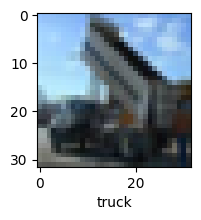

In [53]:
plot_sample(X_test, y_test, 50)